In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
data_path = "../../data/"

# Attendance

In [11]:
df_attendance = pd.read_csv(data_path + 'attendance.csv')
df_attendance.head()

,USAGE_DATE,FACILITY_NAME,attendance
0,2018-06-01,PortAventura World,46804
1,2018-06-01,Tivoli Gardens,20420
2,2018-06-02,PortAventura World,57940
3,2018-06-02,Tivoli Gardens,29110
4,2018-06-03,PortAventura World,44365


In [12]:
df_attendance.isna().sum()

USAGE_DATE       0
FACILITY_NAME    0
attendance       0
dtype: int64

In [13]:
df_attendance["FACILITY_NAME"].value_counts()

FACILITY_NAME
Tivoli Gardens        1185
PortAventura World    1182
Name: count, dtype: int64

In [14]:
df_attendance.describe()

,attendance
count,2367.000000
mean,26008.374736
std,16952.262456
min,-9991.000000
25%,13373.000000
50%,23376.000000
75%,36127.500000
max,80642.000000


There are negative attendance rows which makes no sense.

In [15]:
print(f"There are {df_attendance[(df_attendance["FACILITY_NAME"] == "PortAventura World")&(df_attendance["attendance"]<0)].shape[0]} rows out of {df_attendance[df_attendance["FACILITY_NAME"] == "PortAventura World"].shape[0]} with negative attendance values for PortAventura World")

There are 37 rows out of 1182 with negative attendance values for PortAventura World


In [16]:
print(f"There are {df_attendance[(df_attendance["FACILITY_NAME"] == "Tivoli Gardens")&(df_attendance["attendance"]<0)].shape[0]} rows out of {df_attendance[df_attendance["FACILITY_NAME"] == "Tivoli Gardens"].shape[0]} with negative attendance values for Tivoli Gardens")

There are 46 rows out of 1185 with negative attendance values for Tivoli Gardens


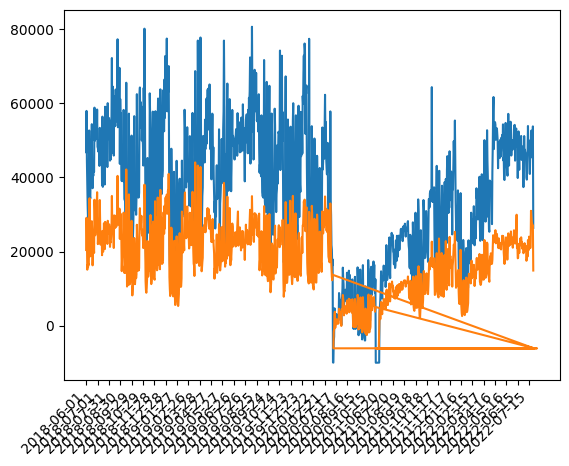

In [17]:
# Let us plot the attendance for each facility over time
plt.plot(df_attendance["USAGE_DATE"][df_attendance["FACILITY_NAME"] == "PortAventura World"], df_attendance["attendance"][df_attendance["FACILITY_NAME"] == "PortAventura World"], label="PortAventura World")
plt.plot(df_attendance["USAGE_DATE"][df_attendance["FACILITY_NAME"] == "Tivoli Gardens"], df_attendance["attendance"][df_attendance["FACILITY_NAME"] == "Tivoli Gardens"], label="Tivoli Gardens")
plt.xticks(df_attendance["USAGE_DATE"][df_attendance["FACILITY_NAME"]== "PortAventura World"][::30], rotation=45, ha='right')
plt.show()

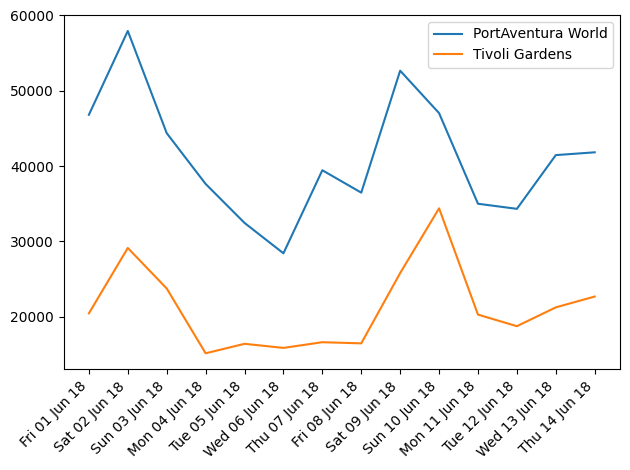

In [68]:
df_attendance["USAGE_DATE"] = pd.to_datetime(df_attendance["USAGE_DATE"])
plt.plot(
    df_attendance["USAGE_DATE"][df_attendance["FACILITY_NAME"] == "PortAventura World"][:14], 
    df_attendance["attendance"][df_attendance["FACILITY_NAME"] == "PortAventura World"][:14], 
    label="PortAventura World"
)
plt.plot(
    df_attendance["USAGE_DATE"][df_attendance["FACILITY_NAME"] == "Tivoli Gardens"][:14], 
    df_attendance["attendance"][df_attendance["FACILITY_NAME"] == "Tivoli Gardens"][:14], 
    label="Tivoli Gardens"
)

date_format = mdates.DateFormatter('%a %d %b %y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


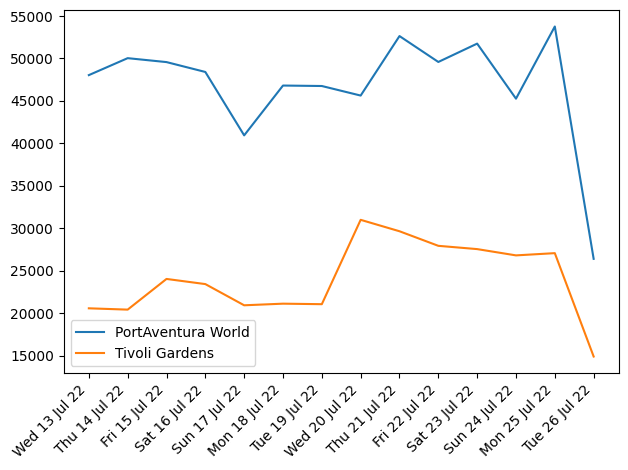

In [70]:
# Let us compare the attendance for both facilities over the last 7 days
plt.plot(df_attendance["USAGE_DATE"][df_attendance["FACILITY_NAME"] == "PortAventura World"][-14:], df_attendance["attendance"][df_attendance["FACILITY_NAME"] == "PortAventura World"][-14:], label="PortAventura World")
plt.plot(df_attendance["USAGE_DATE"][df_attendance["FACILITY_NAME"] == "Tivoli Gardens"][-14:], df_attendance["attendance"][df_attendance["FACILITY_NAME"] == "Tivoli Gardens"][-14:], label="Tivoli Gardens")

date_format = mdates.DateFormatter('%a %d %b %y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


# Entitity schedule

Gives information on park and attraction closure

In [20]:
df_entity_schedule = pd.read_csv(data_path + 'entity_schedule.csv')
df_entity_schedule.head()

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
0,NaN,Tivoli Gardens,PARK,2018-11-19 10:00:00.000,2018-11-19 18:00:00.000,2018-11-20 08:24:32.000,2018-11-19
1,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07
2,NaN,Sling Shot,ATTR,2018-03-28 08:37:00.000,2018-03-28 18:12:00.000,2018-03-29 08:24:37.000,2018-03-28
3,NaN,Gondola,ATTR,2019-04-11 09:55:00.000,2019-04-11 20:19:00.000,2019-04-12 08:59:29.000,2019-04-11
4,NaN,Monorail,ATTR,2019-06-29 08:30:00.000,2019-06-29 20:35:00.000,2019-06-30 08:14:16.000,2019-06-29


In [21]:
df_entity_schedule.shape

(38307, 7)

In [22]:
for column in df_entity_schedule.columns:
    print(df_entity_schedule[column].value_counts())
    print("")

REF_CLOSING_DESCRIPTION
Fermeture Réhab             3613
Fermeture Opérationnelle     859
Name: count, dtype: int64

ENTITY_DESCRIPTION_SHORT
Tivoli Gardens        1864
PortAventura World    1864
Flying Coaster         932
Crazy Bus              932
Spiral Slide           932
Superman Ride          932
Drop Tower             932
Merry Go Round         932
Bumper Cars            932
Giant Wheel            932
Roller Coaster         932
Bungee Jump            932
Go-Karts               932
Haunted House          932
Zipline                932
Pirate Ship            932
Crazy Dance            932
Circus Train           932
Dizzy Dropper          932
Rapids Ride            932
Log Flume              932
Water Ride             932
Kiddie Coaster         932
Free Fall              932
Inverted Coaster       932
Himalaya Ride          932
Giga Coaster           932
Spinning Coaster       932
Swing Ride             932
Power Tower            931
Reverse Bungee         931
Scooby Doo           

In [23]:
df_entity_schedule[df_entity_schedule["ENTITY_TYPE"]=="PARK"].groupby("ENTITY_DESCRIPTION_SHORT").agg({"REF_CLOSING_DESCRIPTION":lambda x:x.notnull().sum(),"ENTITY_DESCRIPTION_SHORT":"count"})

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT
ENTITY_DESCRIPTION_SHORT,,
PortAventura World,0,1864
Tivoli Gardens,0,1864


In [24]:
df_closures = df_entity_schedule[df_entity_schedule["ENTITY_TYPE"]=="ATTR"].groupby("ENTITY_DESCRIPTION_SHORT").agg(
    num_of_closures=("REF_CLOSING_DESCRIPTION",lambda x:x.notnull().sum()),
    num_of_total_days=("ENTITY_DESCRIPTION_SHORT","count")).reset_index()
df_closures["percentage_of_closures"] = df_closures["num_of_closures"]/df_closures["num_of_total_days"]
df_closures = df_closures.sort_values("percentage_of_closures",ascending=False)
df_closures

,ENTITY_DESCRIPTION_SHORT,num_of_closures,num_of_total_days,percentage_of_closures
35,Top Spin,562,931,0.603652
16,Inverted Coaster,482,932,0.517167
19,Merry Go Round,479,932,0.513948
22,Pirate Ship,436,932,0.467811
34,Tilt-A-Whirl,19,53,0.358491
36,Vertical Drop,19,53,0.358491
29,Sling Shot,276,931,0.296455
15,Himalaya Ride,257,932,0.275751
21,Oz Theatre,201,930,0.216129
13,Gondola,170,931,0.182599


# Link attraction park

A mapping of each attraction with its correpsonding park

In [34]:
df_link_attraction_park = pd.read_csv(data_path + 'link_attraction_park.csv')
df_link_attraction_park["attraction"] = df_link_attraction_park["ATTRACTION;PARK"].str.split(";").str[0]
df_link_attraction_park["park"] = df_link_attraction_park["ATTRACTION;PARK"].str.split(";").str[1]
df_link_attraction_park = df_link_attraction_park.drop("ATTRACTION;PARK",axis=1)
df_link_attraction_park = df_link_attraction_park.sort_values("park")
df_link_attraction_park

,attraction,park
19,Merry Go Round,PortAventura World
36,Vertical Drop,PortAventura World
33,Swing Ride,PortAventura World
32,Superman Ride,PortAventura World
31,Spiral Slide,PortAventura World
30,Spinning Coaster,PortAventura World
26,Roller Coaster,PortAventura World
24,Rapids Ride,PortAventura World
21,Oz Theatre,PortAventura World
37,Water Ride,PortAventura World


# Waiting times

In [36]:
df_waiting_times = pd.read_csv(data_path + 'waiting_times.csv')
df_waiting_times.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
0,2018-01-01,2018-01-01 21:00:00.000,21,2018-01-01 21:15:00.000,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0
1,2018-01-01,2018-01-01 19:30:00.000,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0
2,2018-01-01,2018-01-01 22:30:00.000,22,2018-01-01 22:45:00.000,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0
3,2018-01-01,2018-01-01 12:45:00.000,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0
4,2018-01-01,2018-01-01 17:00:00.000,17,2018-01-01 17:15:00.000,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0


In [125]:
df_waiting_times[(df_waiting_times["WORK_DATE"]=="2018-01-01")&(df_waiting_times["ENTITY_DESCRIPTION_SHORT"]=="Roller Coaster")].sort_values("DEB_TIME")

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,USED_CAPACITY
1115,2018-01-01,2018-01-01 09:00:00.000,9,2018-01-01 09:15:00.000,Roller Coaster,0,1.0000,0.0,0.0,0.0,0,0,0,2.0,0.000000
1782,2018-01-01,2018-01-01 09:15:00.000,9,2018-01-01 09:30:00.000,Roller Coaster,0,1.0000,0.0,0.0,0.0,0,0,0,2.0,0.000000
1418,2018-01-01,2018-01-01 09:30:00.000,9,2018-01-01 09:45:00.000,Roller Coaster,0,1.0000,0.0,0.0,0.0,0,0,0,2.0,0.000000
594,2018-01-01,2018-01-01 09:45:00.000,9,2018-01-01 10:00:00.000,Roller Coaster,0,1.0000,0.0,0.0,0.0,0,0,0,2.0,0.000000
262,2018-01-01,2018-01-01 10:00:00.000,10,2018-01-01 10:15:00.000,Roller Coaster,20,1.0000,21.0,75.0,37.5,15,15,0,2.0,0.560000
1580,2018-01-01,2018-01-01 10:15:00.000,10,2018-01-01 10:30:00.000,Roller Coaster,20,1.8667,43.0,75.0,70.0,15,15,0,2.0,0.614286
751,2018-01-01,2018-01-01 10:30:00.000,10,2018-01-01 10:45:00.000,Roller Coaster,20,2.0000,66.0,75.0,75.0,15,15,0,2.0,0.880000
925,2018-01-01,2018-01-01 10:45:00.000,10,2018-01-01 11:00:00.000,Roller Coaster,25,1.8000,42.0,75.0,67.5,15,15,0,2.0,0.622222
1474,2018-01-01,2018-01-01 11:00:00.000,11,2018-01-01 11:15:00.000,Roller Coaster,25,2.0000,39.0,75.0,75.0,15,15,0,2.0,0.520000
1870,2018-01-01,2018-01-01 11:15:00.000,11,2018-01-01 11:30:00.000,Roller Coaster,25,2.0000,35.0,75.0,75.0,15,15,0,2.0,0.466667


- **ENTITY_DESCRIPTION_SHORT**: Name of the entity (park, attraction)  
- **WAIT_TIME_MAX**: Max waiting time during the considered period (in minutes)  
- **NB_UNITS**: Number of units in the attraction  
- **GUEST_CARRIED**: Number of guests carried during the period  
- **CAPACITY**: Capacity of the attraction  
- **ADJUST_CAPACITY**: Adjusted capacity of the attraction to the time slot considered  
- **OPEN_TIME**: Open time of the attraction (in minutes)  
- **UP_TIME**: Up time of the attraction (in minutes)  
- **DOWNTIME**: Down time of the attraction (in minutes)  
- **NB_MAX_UNIT**: Maximum number of units the attraction can take  

In [43]:
# Looking for the longest waiting lines
df_waiting_times.groupby("ENTITY_DESCRIPTION_SHORT").agg({"WAIT_TIME_MAX":"mean"}).sort_values("WAIT_TIME_MAX",ascending=False).reset_index()

,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX
0,Monorail,35.387042
1,Spiral Slide,32.245107
2,Giant Wheel,31.422579
3,Swing Ride,29.313063
4,Tilt-A-Whirl,27.993695
5,Free Fall,24.277858
6,Scooby Doo,24.275360
7,Aeroplane Ride,22.556130
8,Log Flume,22.349700
9,Go-Karts,21.792256


In [41]:
# Checking for missing data
df_waiting_times.groupby("ENTITY_DESCRIPTION_SHORT").agg(num_of_data_points=("WORK_DATE","count")).reset_index().sort_values("num_of_data_points",ascending=False)

,ENTITY_DESCRIPTION_SHORT,num_of_data_points
12,Go-Karts,94660
6,Dizzy Dropper,94659
2,Bungee Jump,94658
30,Spinning Coaster,94656
28,Skyway,94656
13,Gondola,94656
16,Inverted Coaster,94655
7,Drop Tower,94654
33,Swing Ride,94652
8,Flying Coaster,94652


In [56]:
# Analyzing capacity usage for each attraction
df_waiting_times["USED_CAPACITY"] = np.where(df_waiting_times["ADJUST_CAPACITY"]!=0,df_waiting_times["GUEST_CARRIED"]/df_waiting_times["ADJUST_CAPACITY"], 0)
df_waiting_times.groupby("ENTITY_DESCRIPTION_SHORT").agg({"USED_CAPACITY":"mean"}).sort_values("USED_CAPACITY",ascending=False).reset_index()

,ENTITY_DESCRIPTION_SHORT,USED_CAPACITY
0,Bungee Jump,0.419864
1,Zipline,0.383065
2,Go-Karts,0.380826
3,Drop Tower,0.377494
4,Haunted House,0.362430
5,Crazy Bus,0.355861
6,Bumper Cars,0.353717
7,Spinning Coaster,0.348779
8,Skyway,0.343767
9,Giant Wheel,0.332135


For some attractions, used_capacity > 1 so it makes no sense

# Weather

In [58]:
df_weather = pd.read_csv(data_path + 'weather_data.csv')
df_weather.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,915148800,1999-01-01 00:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.33,NaN,3.39,5.28,...,NaN,NaN,NaN,NaN,NaN,8,800,Clear,sky is clear,01n
1,915152400,1999-01-01 01:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.08,NaN,3.54,5.18,...,NaN,NaN,NaN,NaN,NaN,6,800,Clear,sky is clear,01n
2,915156000,1999-01-01 02:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,8.08,NaN,4.11,5.38,...,NaN,NaN,NaN,NaN,NaN,14,801,Clouds,few clouds,02n
3,915159600,1999-01-01 03:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,7.31,NaN,3.73,4.42,...,NaN,NaN,NaN,NaN,NaN,39,802,Clouds,scattered clouds,03n
4,915163200,1999-01-01 04:00:00 +0000 UTC,3600,Custom location,48.873492,2.295104,6.91,NaN,3.53,4.00,...,NaN,NaN,NaN,NaN,NaN,52,803,Clouds,broken clouds,04n


# Parade night shows

Save *parade_night_show.xslx* as a CSV in the data folder

In [78]:
df_parade_shows = pd.read_csv(data_path + "parade_night_show.csv")
df_parade_shows = df_parade_shows.drop(columns=["Unnamed: 0"])
df_parade_shows["WORK_DATE"] = pd.to_datetime(df_parade_shows["WORK_DATE"],format="%m/%d/%y")
df_parade_shows.head()

,WORK_DATE,NIGHT_SHOW,PARADE_1,PARADE_2
0,2018-10-01,20:00:00,17:30:00,12:10:00
1,2018-10-02,20:00:00,17:30:00,12:10:00
2,2018-10-03,20:00:00,17:30:00,12:10:00
3,2018-10-04,20:00:00,17:30:00,12:10:00
4,2018-10-05,20:00:00,17:30:00,12:10:00


# Preparing script for extracting and merging data

In [100]:
df_attendance = pd.read_csv(data_path + 'attendance.csv')
df_attendance_extract = df_attendance[df_attendance["FACILITY_NAME"] == "PortAventura World"].copy()
df_attendance_extract["USAGE_DATE"] = pd.to_datetime(df_attendance_extract["USAGE_DATE"], format="%Y-%m-%d")
df_attendance_extract.rename(columns={"attendance":"PARK_ATTENDANCE"},inplace=True)
df_attendance_extract

,USAGE_DATE,FACILITY_NAME,PARK_ATTENDANCE
0,2018-06-01,PortAventura World,46804
2,2018-06-02,PortAventura World,57940
4,2018-06-03,PortAventura World,44365
6,2018-06-04,PortAventura World,37617
8,2018-06-05,PortAventura World,32438
...,...,...,...
2357,2022-07-22,PortAventura World,49586
2359,2022-07-23,PortAventura World,51748
2361,2022-07-24,PortAventura World,45261
2363,2022-07-25,PortAventura World,53764


In [101]:
df_link_attraction_park = pd.read_csv(data_path + 'link_attraction_park.csv')
df_link_attraction_park["attraction"] = df_link_attraction_park["ATTRACTION;PARK"].str.split(";").str[0]
df_link_attraction_park["park"] = df_link_attraction_park["ATTRACTION;PARK"].str.split(";").str[1]
df_link_attraction_park = df_link_attraction_park.drop("ATTRACTION;PARK",axis=1)
df_link_attraction_park = df_link_attraction_park.sort_values("park")
df_link_attraction_park

,attraction,park
19,Merry Go Round,PortAventura World
36,Vertical Drop,PortAventura World
33,Swing Ride,PortAventura World
32,Superman Ride,PortAventura World
31,Spiral Slide,PortAventura World
30,Spinning Coaster,PortAventura World
26,Roller Coaster,PortAventura World
24,Rapids Ride,PortAventura World
21,Oz Theatre,PortAventura World
37,Water Ride,PortAventura World


In [128]:
df_entity_schedule = pd.read_csv(data_path + 'entity_schedule.csv')
df_entity_schedule_extract = df_entity_schedule[df_entity_schedule["ENTITY_TYPE"] == "ATTR"].copy()
df_entity_schedule_extract["PARK"] = df_entity_schedule_extract["ENTITY_DESCRIPTION_SHORT"].map(df_link_attraction_park.set_index("attraction")["park"])
df_entity_schedule_extract = df_entity_schedule_extract[df_entity_schedule_extract["PARK"]=="PortAventura World"].copy()
df_entity_schedule_extract = df_entity_schedule_extract[["WORK_DATE","ENTITY_DESCRIPTION_SHORT","REF_CLOSING_DESCRIPTION"]].copy()
df_entity_schedule_extract["WORK_DATE"] = pd.to_datetime(df_entity_schedule_extract["WORK_DATE"], format="%Y-%m-%d")
df_entity_schedule_extract.sort_values("WORK_DATE",inplace=True)
df_entity_schedule_extract=df_entity_schedule_extract.rename(columns={"WORK_DATE":"USAGE_DATE"})
df_closure_and_attendance = pd.merge(
    df_entity_schedule_extract,
    df_attendance_extract[["USAGE_DATE", "PARK_ATTENDANCE"]],
    on="USAGE_DATE",
    how="left"
)
df_closure_and_attendance

,USAGE_DATE,ENTITY_DESCRIPTION_SHORT,REF_CLOSING_DESCRIPTION,PARK_ATTENDANCE
0,2018-01-01,Kiddie Coaster,NaN,NaN
1,2018-01-01,Merry Go Round,NaN,NaN
2,2018-01-01,Spiral Slide,NaN,NaN
3,2018-01-01,Spinning Coaster,NaN,NaN
4,2018-01-01,Superman Ride,NaN,NaN
...,...,...,...,...
23346,2022-08-22,Zipline,NaN,NaN
23347,2022-08-22,Vertical Drop,NaN,NaN
23348,2022-08-22,Rapids Ride,NaN,NaN
23349,2022-08-22,Kiddie Coaster,NaN,NaN


In [130]:
df_waiting_times = pd.read_csv(data_path + 'waiting_times.csv')
df_waiting_times.head()

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
0,2018-01-01,2018-01-01 21:00:00.000,21,2018-01-01 21:15:00.000,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0
1,2018-01-01,2018-01-01 19:30:00.000,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0
2,2018-01-01,2018-01-01 22:30:00.000,22,2018-01-01 22:45:00.000,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0
3,2018-01-01,2018-01-01 12:45:00.000,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0
4,2018-01-01,2018-01-01 17:00:00.000,17,2018-01-01 17:15:00.000,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0


In [142]:
df_waiting_times["PARK"] = df_waiting_times["ENTITY_DESCRIPTION_SHORT"].map(df_link_attraction_park.set_index("attraction")["park"])
df_waiting_times_extract = df_waiting_times[df_waiting_times["PARK"]=="PortAventura World"].copy()
df_waiting_times_extract.drop(columns=["PARK"],inplace=True)
df_waiting_times_extract.rename(columns={"WORK_DATE":"USAGE_DATE"},inplace=True)
df_waiting_times_extract["USAGE_DATE"] = pd.to_datetime(df_waiting_times_extract["USAGE_DATE"], format="%Y-%m-%d")
df_closure_and_attendance_and_waiting = pd.merge(df_waiting_times_extract, df_closure_and_attendance, on=["USAGE_DATE","ENTITY_DESCRIPTION_SHORT"], how="left")
df_closure_and_attendance_and_waiting.sort_values(["ENTITY_DESCRIPTION_SHORT","DEB_TIME"])

,USAGE_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,REF_CLOSING_DESCRIPTION,PARK_ATTENDANCE
471,2018-01-01,2018-01-01 09:00:00.000,9,2018-01-01 09:15:00.000,Bumper Cars,5,18.0,108.0000,254.749,254.75,15,15,0,18.0,NaN,NaN
954,2018-01-01,2018-01-01 09:15:00.000,9,2018-01-01 09:30:00.000,Bumper Cars,5,18.0,88.9999,254.749,254.75,15,15,0,18.0,NaN,NaN
385,2018-01-01,2018-01-01 09:30:00.000,9,2018-01-01 09:45:00.000,Bumper Cars,5,18.0,93.0001,254.749,254.75,15,15,0,18.0,NaN,NaN
573,2018-01-01,2018-01-01 09:45:00.000,9,2018-01-01 10:00:00.000,Bumper Cars,5,18.0,55.0000,254.749,254.75,15,15,0,18.0,NaN,NaN
79,2018-01-01,2018-01-01 10:00:00.000,10,2018-01-01 10:15:00.000,Bumper Cars,5,18.0,98.0001,254.749,254.75,15,15,0,18.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369228,2022-08-18,2022-08-18 21:45:00.000,21,2022-08-18 22:00:00.000,Zipline,30,12.0,68.0000,101.250,101.25,15,15,0,12.0,NaN,NaN
2368793,2022-08-18,2022-08-18 22:00:00.000,22,2022-08-18 22:15:00.000,Zipline,30,12.0,59.0000,101.250,101.25,15,15,0,12.0,NaN,NaN
2368404,2022-08-18,2022-08-18 22:15:00.000,22,2022-08-18 22:30:00.000,Zipline,30,12.0,57.0000,101.250,101.25,15,15,0,12.0,NaN,NaN
2369740,2022-08-18,2022-08-18 22:30:00.000,22,2022-08-18 22:45:00.000,Zipline,30,12.0,83.0000,101.250,101.25,15,15,0,12.0,NaN,NaN


In [143]:
pd.read_csv(data_path + 'portaventura_world_data.csv')

/var/folders/k7/yjlj1gk15bj1gjrxppqlsy9r0000gn/T/ipykernel_2142/1100802378.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(data_path + 'portaventura_world_data.csv')


,USAGE_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT,REF_CLOSING_DESCRIPTION,PARK_ATTENDANCE
0,2018-01-01,2018-01-01 21:00:00.000,21,2018-01-01 21:15:00.000,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0,NaN,NaN
1,2018-01-01,2018-01-01 19:30:00.000,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0,NaN,NaN
2,2018-01-01,2018-01-01 22:30:00.000,22,2018-01-01 22:45:00.000,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0,NaN,NaN
3,2018-01-01,2018-01-01 12:45:00.000,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0,NaN,NaN
4,2018-01-01,2018-01-01 18:15:00.000,18,2018-01-01 18:30:00.000,Free Fall,50,3.0,0.0,0.000,0.00,0,0,0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369816,2022-08-18,2022-08-18 18:45:00.000,18,2022-08-18 19:00:00.000,Himalaya Ride,0,0.0,0.0,0.000,0.00,0,0,0,1.0,Fermeture Réhab,NaN
2369817,2022-08-18,2022-08-18 10:15:00.000,10,2022-08-18 10:30:00.000,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0,Fermeture Réhab,NaN
2369818,2022-08-18,2022-08-18 09:15:00.000,9,2022-08-18 09:30:00.000,Crazy Dance,0,0.0,0.0,0.000,0.00,0,0,0,1.0,Fermeture Réhab,NaN
2369819,2022-08-18,2022-08-18 20:30:00.000,20,2022-08-18 20:45:00.000,Giga Coaster,0,0.0,0.0,0.000,0.00,0,0,0,24.0,Fermeture Réhab,NaN


In [145]:
df = pd.read_csv(data_path + "portaventura_world_data.csv")

/var/folders/k7/yjlj1gk15bj1gjrxppqlsy9r0000gn/T/ipykernel_2142/2504262730.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path + "portaventura_world_data.csv")


USAGE_DATE                   object
DEB_TIME                     object
DEB_TIME_HOUR                 int64
FIN_TIME                     object
ENTITY_DESCRIPTION_SHORT     object
WAIT_TIME_MAX                 int64
NB_UNITS                    float64
GUEST_CARRIED               float64
CAPACITY                    float64
ADJUST_CAPACITY             float64
OPEN_TIME                     int64
UP_TIME                       int64
DOWNTIME                      int64
NB_MAX_UNIT                 float64
REF_CLOSING_DESCRIPTION      object
PARK_ATTENDANCE             float64
dtype: object